<a href="https://colab.research.google.com/github/aisyahdnn/Skripsi/blob/master/Dataset8020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#untuk menghubungkan drive ke colab

from google.colab import drive
drive.mount('/content/drive')

In [0]:
import pandas as pd
import numpy as np
import math
import os
import matplotlib.pyplot as plt
import cv2

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from skimage import io
from skimage import feature

In [3]:
terinfeksi_data = os.listdir('/content/drive/My Drive/Dataset/DATA8020/Terinfeksi')
print(terinfeksi_data)

print('\n')

tidakTerinfeksi_data = os.listdir('/content/drive/My Drive/Dataset/DATA8020/TidakTerinfeksi')
print(tidakTerinfeksi_data)

['C39P4thinF_original_IMG_20150622_111206_cell_102.png', 'C39P4thinF_original_IMG_20150622_111206_cell_100.png', 'C39P4thinF_original_IMG_20150622_111206_cell_111.png', 'C39P4thinF_original_IMG_20150622_111206_cell_79.png', 'C39P4thinF_original_IMG_20150622_111206_cell_105.png', 'C39P4thinF_original_IMG_20150622_111206_cell_87.png', 'C39P4thinF_original_IMG_20150622_111206_cell_108.png', 'C39P4thinF_original_IMG_20150622_111206_cell_86.png', 'C39P4thinF_original_IMG_20150622_111206_cell_81.png', 'C39P4thinF_original_IMG_20150622_111206_cell_107.png', 'C39P4thinF_original_IMG_20150622_111206_cell_99.png', 'C39P4thinF_original_IMG_20150622_111206_cell_106.png', 'C39P4thinF_original_IMG_20150622_111206_cell_104.png', 'C39P4thinF_original_IMG_20150622_111206_cell_85.png', 'C39P4thinF_original_IMG_20150622_111206_cell_112.png', 'C39P4thinF_original_IMG_20150622_111206_cell_83.png', 'C39P4thinF_original_IMG_20150622_111206_cell_109.png', 'C39P4thinF_original_IMG_20150622_111326_cell_3.png', 

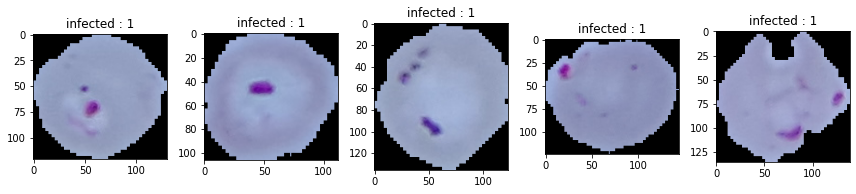

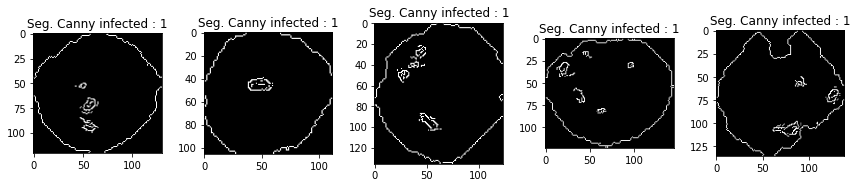

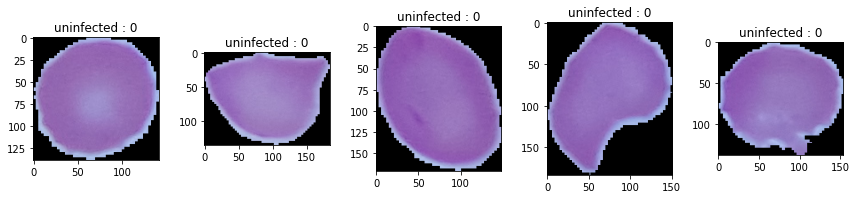

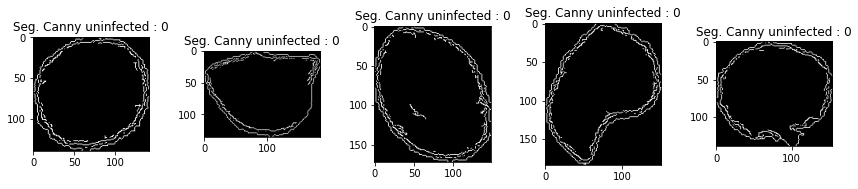

In [4]:
#Tahap Visualisasi Citra Malaria Terinfeksi

plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA8020/Terinfeksi' + "/" + terinfeksi_data[i])
    plt.imshow(img,cmap='gray')
    plt.title('infected : 1')
    plt.tight_layout()

plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA8020/Terinfeksi' + "/" + terinfeksi_data[i])
    edges = cv2.Canny(img,80,30)
    plt.imshow(edges,cmap='gray')
    plt.title('Seg. Canny infected : 1')
    plt.tight_layout()


#Tahap Visualisasi Citra Malaria Tidak Terinfeksi

plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA8020/TidakTerinfeksi' + "/" + tidakTerinfeksi_data[i])
    plt.imshow(img,cmap='gray')
    plt.title('uninfected : 0')
    plt.tight_layout()

plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA8020/TidakTerinfeksi' + "/" + tidakTerinfeksi_data[i])
    edges = cv2.Canny(img,80,30)
    plt.imshow(edges,cmap='gray')
    plt.title('Seg. Canny uninfected : 0')
    plt.tight_layout()
plt.show()

In [0]:
#SEGMENTASI CANNY DAN EKSTRAKSI HUMOMENT

x = np.array([['H1','H2','H3','H4','H5','H6','H7','Actual']])

#Proses Citra Malaria Terinfeksi
for i in range(len(terinfeksi_data)):
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA8020/Terinfeksi' + "/" + terinfeksi_data[i])
    edges = cv2.Canny(img,80,30)
    a = cv2.HuMoments(cv2.moments(edges)).flatten()
    a = np.append(a,1)
    x = np.vstack((x,a))

#Proses Citra Malaria TidakTerinfeksi
for i in range(len(tidakTerinfeksi_data)):
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA8020/TidakTerinfeksi' + "/" + tidakTerinfeksi_data[i])
    edges = cv2.Canny(img,80,30)
    a = cv2.HuMoments(cv2.moments(edges)).flatten()
    a = np.append(a,0)
    x = np.vstack((x,a))

In [0]:
#EXPORT to CSV
np.savetxt("/content/drive/My Drive/Dataset/DatasetMalaria8020.csv", x, fmt='%s',delimiter=',' )

In [7]:
#LOAD CSV DATASET

dataset = pd.read_csv('/content/drive/My Drive/Dataset/DatasetMalaria8020.csv')
print (len(dataset))
print (dataset)

1000
           H1            H2            H3  ...            H6            H7  Actual
0    0.020606  2.046463e-06  5.301578e-08  ...  2.813537e-10  3.359297e-14     1.0
1    0.027723  6.006392e-06  1.210919e-08  ... -9.675056e-11  8.201038e-16     1.0
2    0.019761  1.809606e-05  2.855638e-07  ... -1.764429e-09  6.422175e-14     1.0
3    0.021648  7.368367e-06  2.400949e-07  ...  1.033725e-09 -1.121807e-13     1.0
4    0.018605  3.512479e-07  5.618309e-08  ... -5.524489e-11  3.482809e-14     1.0
..        ...           ...           ...  ...           ...           ...     ...
995  0.045219  2.137164e-05  4.845882e-08  ... -5.404949e-10  8.723522e-15     0.0
996  0.040006  3.158007e-07  3.813799e-06  ... -4.194548e-11 -3.941942e-14     0.0
997  0.041283  1.063268e-05  9.545901e-08  ...  2.082204e-11  1.452567e-14     0.0
998  0.034514  7.839604e-05  1.202540e-06  ...  8.300950e-09 -8.378332e-13     0.0
999  0.042434  1.752171e-05  2.350503e-08  ...  1.338997e-10  3.881085e-18     0.0

In [8]:
#split target and attribute (membagi data)
x = dataset.iloc[:, 0:7] #mulai dr colmn index ke0, sbnyk 7 colmn msuk ke var (X)
y = dataset.iloc[:, 7] #hny colmn  index ke7 yg msuk ke var (Y)


#split train n test dataset
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=2, test_size=0.1)

print(len(y_test))
print(len(x_train))
print(len(dataset))
x

100
900
1000


,H1,H2,H3,H4,H5,H6,H7
0,0.020606,2.046463e-06,5.301578e-08,3.825356e-07,-4.288610e-14,2.813537e-10,3.359297e-14
1,0.027723,6.006392e-06,1.210919e-08,6.638696e-08,1.694216e-15,-9.675056e-11,8.201038e-16
2,0.019761,1.809606e-05,2.855638e-07,5.148531e-07,-1.866751e-13,-1.764429e-09,6.422175e-14
3,0.021648,7.368367e-06,2.400949e-07,4.104384e-07,-6.337355e-14,1.033725e-09,-1.121807e-13
4,0.018605,3.512479e-07,5.618309e-08,3.010513e-07,-1.788717e-14,-5.524489e-11,3.482809e-14
...,...,...,...,...,...,...,...
995,0.045219,2.137164e-05,4.845882e-08,1.169888e-07,-1.220704e-15,-5.404949e-10,8.723522e-15
996,0.040006,3.158007e-07,3.813799e-06,8.845486e-08,3.294870e-14,-4.194548e-11,-3.941942e-14
997,0.041283,1.063268e-05,9.545901e-08,1.683334e-07,1.563128e-14,2.082204e-11,1.452567e-14
998,0.034514,7.839604e-05,1.202540e-06,1.039504e-06,-8.054772e-13,8.300950e-09,-8.378332e-13


1.0    722
0.0    178
Name: Actual, dtype: int64
1.0    78
0.0    22
Name: Actual, dtype: int64


Text(0.5, 1.0, 'TESTING')

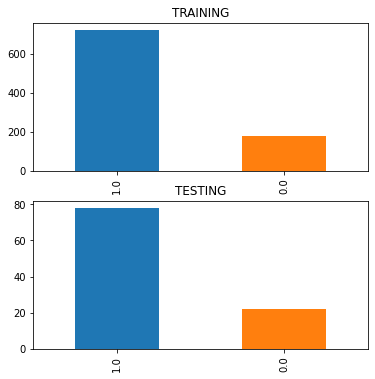

In [9]:
print(y_train.value_counts()) #mnmpilkn jum.data y_train brdsrkn value

print(y_test.value_counts())  #mnmpilkn jum.data y_test brdsrkn value


plt.figure(figsize=(6,6)) #mngtur ukuran skla grafik

#mnmpilkn visualisasi grafik
plt.subplot(2,1,1);y_train.value_counts().plot(kind='bar', color=['C0','C1','C2','C3','C4','C5','C6']);plt.title('TRAINING')
plt.subplot(2,1,2);y_test.value_counts().plot(kind='bar', color=['C0','C1','C2','C3','C4','C5','C6']);plt.title('TESTING')

In [10]:
#scaling data
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)

x_test = sc_x.transform(x_test)
x_train

array([[ 0.01662189, -0.44784057, -0.28835865, ...,  0.04395674,
        -0.31115306, -0.01110804],
       [-1.2086611 , -0.55266463, -0.39783721, ...,  0.04670712,
        -0.33857193, -0.02189322],
       [ 0.1862789 , -0.3802343 , -0.45360937, ...,  0.04498449,
        -0.35094608, -0.02192418],
       ...,
       [-1.7965226 , -0.56813004, -0.4985821 , ...,  0.04501363,
        -0.34819837, -0.0220144 ],
       [-1.20612554, -0.5624975 , -0.47282553, ...,  0.05401006,
        -0.34760808, -0.02499202],
       [-0.4087179 ,  0.36925999,  0.21702303, ...,  0.04879232,
        -0.03375027, -0.10682151]])

In [11]:
math.sqrt(len(y_test))

10.0

In [12]:
#choose method and fitting
classifier = KNeighborsClassifier(n_neighbors=10,p=2,metric='euclidean')
classifier.fit (x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [15]:
#proses testing

#hasil prediksi/testing dismpn ke (y_pred)
y_pred = classifier.predict(x_test)
y_pred

array([1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1.])

In [16]:
#print result
cm = confusion_matrix(y_test, y_pred)
print (cm)
print("Akurasi :" , accuracy_score(y_test, y_pred))
print("Presisi :" , precision_score(y_test, y_pred))
print("Recall :" , recall_score(y_test, y_pred))
print("F-Measure :" , f1_score(y_test, y_pred))

[[11 11]
 [ 5 73]]
Akurasi : 0.84
Presisi : 0.8690476190476191
Recall : 0.9358974358974359
F-Measure : 0.9012345679012346


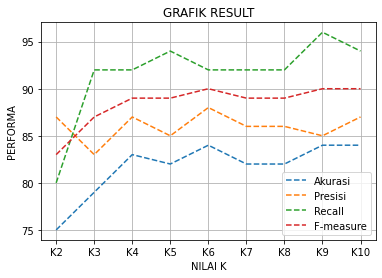

In [13]:
from matplotlib import pyplot as plt
x = ["K2", "K3", "K4", "K5", "K6", "K7", "K8", "K9", "K10"]
a = [75, 79, 83, 82, 84, 82, 82, 84, 84]
p = [87, 83, 87, 85, 88, 86, 86, 85, 87]
r = [80, 92, 92, 94, 92, 92, 92, 96, 94]
f = [83, 87, 89, 89, 90, 89, 89, 90, 90]
plt.plot(x, a, '--')
plt.plot(x, p, '--')
plt.plot(x, r, '--')
plt.plot(x, f, '--')
plt.title("GRAFIK RESULT")
plt.xlabel("NILAI K")
plt.ylabel("PERFORMA")
plt.legend(["Akurasi", "Presisi", "Recall", "F-measure"])
plt.grid()
plt.show()